# Understanding the risks of excluding population groups in whole population sampling
In this example we will be looking at the whole population A∪B, where B represents a minority group. B could represent an ethnic minority group or a vulnerable patient group. 

Sampling from the general population A∪B carries a risk of underrepresenting group B which grows when A:B is high and sample fraction * B < 3.

Calculating P(nB=0,1) is a lengthy calculation. This notebook provides a 'ready reckoner' by simulating a general population sampling exercise and generating estimates for P(nB=x).

Practitioners should prioritise stratified random sampling when P(nB=0∪1) is high. 

For this exercise we will use a sample fraction of 0.2.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def gen_frame(a): #generates a data set of 100 people when a is the fraction of people belonging to group B
    a=int(a*100)
    colu1 = [0] * (100-a)
    colu2=  [1] * a
    colu = colu1+colu2
    df = pd.DataFrame(colu)
    return df

def count_zeros(lst): #counts how many zeros our list contains
    zeros=lst.count(0)
    return zeros
        

def random_sample(df): #takes a sample fraction of A∪B and provides absolute count of nB
    size = len(df.index) * 0.2
    size = int(size)
    samp = df.sample(size) 
    cnt= samp[samp == 1].sum(axis=0)
    return cnt

def single_run_with_zeros(df): # runs the simulation 100 times and returns how many times nB=0
    run=[]
    i = 1
    while i < 10000:   
        run.append(int(random_sample(df)))
        i += 1
    z= count_zeros(run)
    return z/i  

def single_run(df,iterations): # runs the simulation 100 times and returns list of nB.
  run=[]
#  iterations=100
  i = 1
  while i < iterations:   
    run.append(int(random_sample(df)))
    i += 1
  return run

We will start by running our simulation 100 times where a (the proportion of group B in the general population) is 0.1.


In [ ]:
a=0.1
df = gen_frame(a)
run = single_run(df,100)
print(run)


[2, 2, 2, 1, 1, 1, 0, 1, 4, 4, 3, 2, 3, 1, 3, 2, 2, 0, 1, 3, 2, 3, 1, 1, 2, 1, 1, 2, 3, 4, 3, 4, 2, 3, 1, 1, 0, 1, 2, 4, 2, 3, 2, 2, 3, 2, 4, 1, 3, 1, 0, 1, 1, 5, 4, 1, 2, 1, 0, 2, 4, 4, 2, 3, 3, 2, 1, 3, 1, 2, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 0, 2, 1, 3, 3, 4, 2, 0, 2, 3, 1, 2, 2, 1, 2, 2]


Let's understand P(nb=x) with a histogram

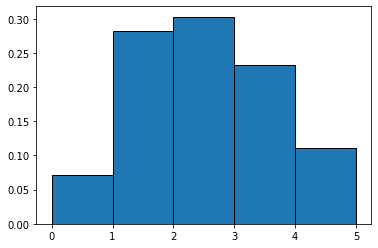

In [ ]:
bins = np.arange(0,6,1)

hist, edges = np.histogram(run, bins)
freq = hist/float(hist.sum())

plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )

plt.show()
#print('Probability of selecting zero=',hist[0]/100)




Although the expectation value for this sample is 2, we can already see it is more likely population group B will be unrepresented than be representated proportionally. 

Let's read off some more probabilities.



In [ ]:
zer= run.count(0)
undr= run.count(0) + run.count(1)
corr= run.count(2)
ovr= run.count(3) + run.count(4)

print('Probability of zero representation=',hist[0]/100)
print('Probability of under representation=',undr/100)
print('Probability of proportional representation=',corr/100)
print('Probability of over representation=',ovr/100)

Probability of zero representation= 0.07
Probability of under representation= 0.35
Probability of proportional representation= 0.3
Probability of over representation= 0.33


In this example we have demonstrated that a minority group of 10% of the general population is more likely to be unrepresented than overrepresented in a random, non-stratified sample. 

# Part 2: General case

In part 2 we are going to model how the probability of zero representation varies as the fraction of our minority group changes between 1 and 20%. We will run 10,000 simulations and plot the proportion of runs in which zero representation occurs.

        0
0   0.999
1   0.785
2   0.650
3   0.501
4   0.421
5   0.319
6   0.254
7   0.187
8   0.147
9   0.144
10  0.104
11  0.076
12  0.053
13  0.041
14  0.037
15  0.020
16  0.015
17  0.019
18  0.008
19  0.016
20  0.005


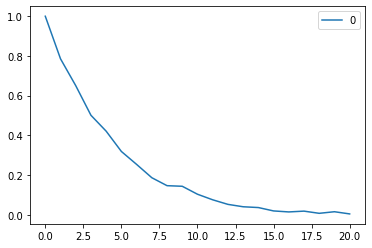

In [ ]:
i=0
output = []
while i<21:
    df= gen_frame(i/100)
    z= single_run_with_zeros(df)    
    output.append(z)
    i +=1
outdf=pd.DataFrame(output)
print (outdf)
sns.lineplot(data=outdf)

This demonstrates that the probability of selecting zero people from a minority group decreases non-linearly as the proportion of this group increases. There is a steep fall off at >0.08, however this remains non-zero as far as 0.20. 
<br>
<br>
This plot demonstrates the importance of using sampling techniques such as stratified random sampling to mitigate against this effect. 
